In [73]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

In [74]:
EMBEDDING_MODEL = 'GanymedeNil_text2vec-large-chinese'
EMBEDDING_TYPE = 'title&pyq'
SEED = 19260817

In [75]:
train_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/train_dataset_{EMBEDDING_TYPE}.csv')
val_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/val_dataset_{EMBEDDING_TYPE}.csv')
test_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/test_dataset_{EMBEDDING_TYPE}.csv')

### fit the model

In [76]:
train_X = train_df.drop('label', axis = 1)
train_Y = train_df['label']
test_X = test_df.drop('label', axis = 1)
test_Y = test_df['label']
val_X = val_df.drop('label', axis = 1)
val_Y = val_df['label']

In [77]:
GB_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=25, subsample=0.4, min_samples_split=2, max_depth=384, max_features=0.25, random_state=42)

In [78]:
GB_model.fit(train_X, train_Y)

GradientBoostingRegressor(max_depth=384, max_features=0.25, n_estimators=25,
                          random_state=42, subsample=0.4)

In [79]:
val_y_pred = GB_model.predict(val_X)
val_r2 = r2_score(val_Y, val_y_pred)
val_r2

0.19773408343131127

In [80]:
test_y_pred = GB_model.predict(test_X)
test_r2 = r2_score(test_Y, test_y_pred)
test_r2

0.08141369723841951

### get feature importance

In [81]:
feature_importance = GB_model.feature_importances_

In [82]:
importance_df = pd.DataFrame({
    'Feature': train_X.columns,
    'Importance': feature_importance
})

In [83]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,pyq_text_0,0.057882
45,title_13,0.049766
36,title_4,0.036180
10,pyq_text_10,0.033228
41,title_9,0.032158
...,...,...
11,pyq_text_11,0.004639
14,pyq_text_14,0.002757
18,pyq_text_18,0.002321
21,pyq_text_21,0.001345


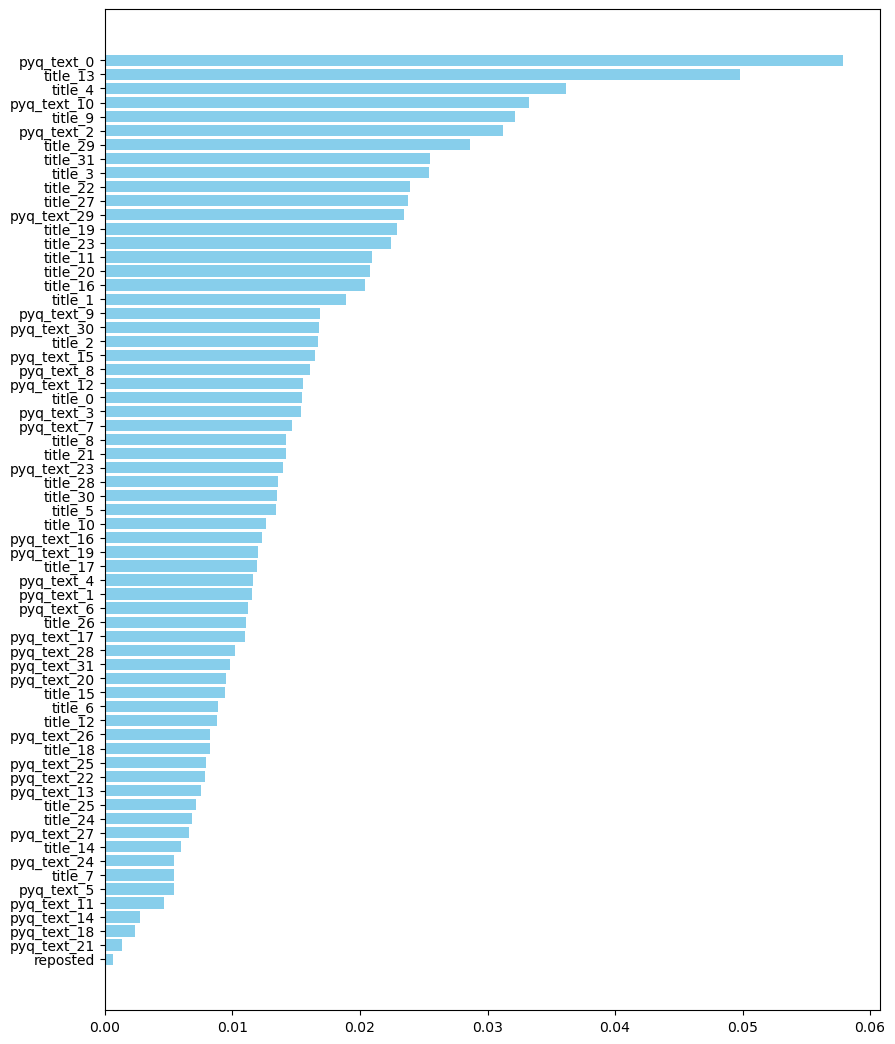

In [84]:
plt.figure(figsize=(10,13))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel = 'Feature'
plt.ylabel = 'Importance'
plt.title = 'RF Feature Importance Plot'
plt.gca().invert_yaxis()
plt.show()